<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/M%C3%A9todos_de_aproximaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolución de ecuaciones no lineales como alguna trascendental.
$$
e^{x^{2}}+cte=0
$$
$$
y+\tan(x)=0
$$


1.   Búsqueda incremental
2.   Bisección
3.   Newton-Rhapson
4.   Secante
5.   Ridders

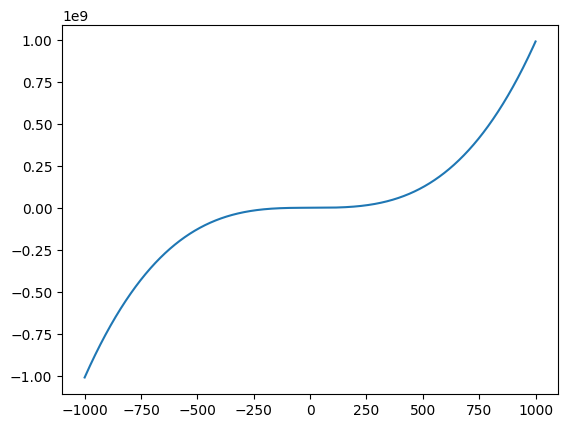

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Teo.Valor intermedio, si el signo de f(x1) distinto signo f(x2), existe una raiz. f(x1)*f(x2)<0 signos diferentes, f(x1)*f(x2)>0 signos iguales
#sino me muevo de intervalo y así voy avanzando
#Cuando encuentro cambio de signo, la raiz es alpha=x_{0}+-h/2 (mitad de la longitud del intervalo)
#while corre sobre el signo, mientras sea positivo hago algo
def f(x):
  return (x**3)-10*(x**2)+5
x=np.arange(-1000,1000,0.1)
plt.plot(x,f(x))
plt.show()
D=1000
x1=-1000
x2=-995
l=x2-x1
error=0.00001

x=np.arange(x1,x2,0.1)
if f(x1)*f(x2)>0:
  x1+=x2
  x2+=x1+l
else:
   x_0=(x2-x1)/2
   alpha=(x2-x1)/2
   print(x_0,'+-',alpha)

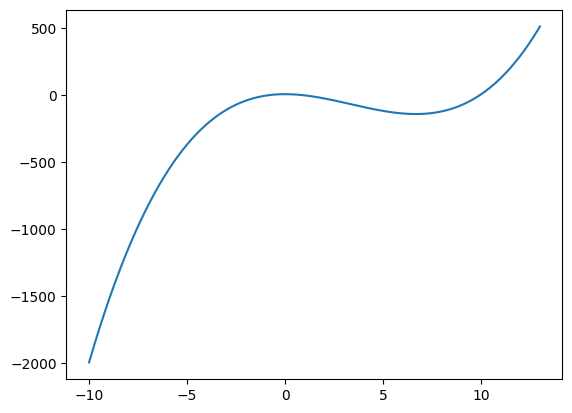

In [9]:
from pylab import * #matplotlib,sympy,etc
from numpy import *
def func(x):
  y=x**3-10*x**2+5
  return y
x=arange(-10,13,0.01)
plt.plot(x,func(x))

In [10]:
def busqueda_incremental(f,a,b,h):
  x0=a
  x1=a+h
  n = 0  # Initialize n to 0
  while f(x0)*f(x1)>0:
    x0=x1
    x1=x0+h
    if x1>b:
      return ('No hay raiz')
      break
    n+=1
  return x1,n
print(busqueda_incremental(func,-2,0,1e-7))

(-0.6840944995824116, 13159054)


In [13]:
import pandas as pd
lista_incremental=[]
idx=[]
valor_real= -0.6840944995824116 # Assign a value to valor_real
for i in range(1,6):
 tol=10**(-i)
 idx.append(tol)
 raiz=busqueda_incremental(func,0,0.8,tol) #cada renglon de la tabla
 error=(abs(valor_real-raiz[0])/valor_real)*100 #funciona mal con raices multiples, es lineal su convergencia
 lista_incremental.append([raiz[0],raiz[1],error])
cols=['raiz','pasos','error%']
pd.DataFrame(lista_incremental, index=idx,columns=cols)

,raiz,pasos,error%
0.10000,0.80000,7,-216.942908
0.01000,0.74000,73,-208.172190
0.00100,0.73500,734,-207.441297
0.00010,0.73470,7346,-207.397443
0.00001,0.73461,73460,-207.384287


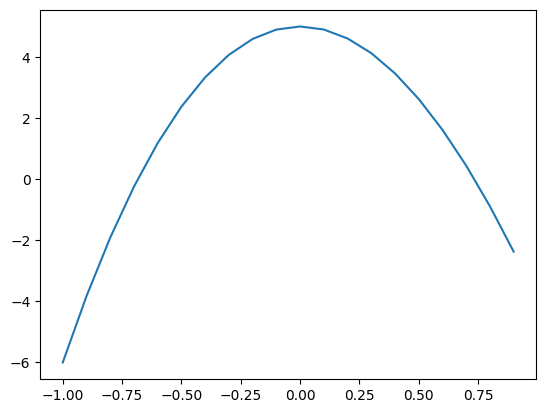

[0.7346035957336425, 23]
El intervalo no tiene raíz
El intervalo no tiene raíz
El intervalo no tiene raíz
El intervalo no tiene raíz
El intervalo no tiene raíz


,raiz,pasos,error%
0.10000,No hay raiz,N/A,N/A
0.01000,No hay raiz,N/A,N/A
0.00100,No hay raiz,N/A,N/A
0.00010,No hay raiz,N/A,N/A
0.00001,No hay raiz,N/A,N/A


In [15]:
#Biseccion
#x0,x1 las fronteras del intervalo, luego tomo x2=(x1+x2)/2
#si f(x0)*f(x2)<0, x1=x2
#if f(x2)*(fx1)<0, x0=x2 y sigo iterando cortando a la mitad, hasta que x2=(x0+x1)/2 sea la raiz
#convergencia 2**n
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def f(x):
  return (x**3)-10*(x**2)+5
x=np.arange(-1,1,0.1)
plt.plot(x,f(x))
plt.show()

def biseccion(f,x0,x1,epsilon=1e-7):
  contador=0
  dx=abs(x1-x0)
  while dx>epsilon:
   x2=(x0+x1)/2
   if f(x0)*f(x2)<0:
      x1=x2
   elif f(x2)*f(x1)<0:
      x0=x2
   else:
      print('El intervalo no tiene raíz')
      return None # Return None if no root is found
   dx=abs(x1-x0)
   contador=contador+1
  return [x2,contador]

print(biseccion(f,0,0.8))

lista_biseccion=[]
idx=[]
valor_real=-0.6840944995824116 # Assuming this is the correct real value for comparison
for i in range(1,6): # Changed range to match the previous cell's output
 tol=10**(-i)
 idx.append(tol)
 raiz_data=biseccion(f,0,tol) # Get the result from biseccion
 if raiz_data is not None: # Check if a root was found
  raiz, pasos = raiz_data
  error=(abs(valor_real-raiz)/valor_real)*100
  lista_biseccion.append([raiz,pasos,error])
 else:
  lista_biseccion.append(['No hay raiz', 'N/A', 'N/A']) # Handle case where no root is found

cols=['raiz','pasos','error%']
pd.DataFrame(lista_biseccion, index=idx,columns=cols)

Repaso precisión y errores

In [16]:
from random import  *
l=[]
for i in range(10):
  x=uniform(0.8,2.8)
  l.append(x)
n=len(l)
suma=0
for i in range(n):
  suma+=l(i)
  promedio=suma/n

  error=max(l)-min(l)
  print('El promedio resultante es') #Módulo decimal, estrategia número 1, algunas funciones las reconoce, otras no, creamos variables con la función decimal

TypeError: 'list' object is not callable

In [ ]:
from decimal import *
from math import *
print(1/7)
getcontext().prec=6
print(Decimal(1)/Decimal(7))
getcontext().prec=60
print(1/7)
print(Decimal(1)/Decimal(7))
#Hacer manipulaciones algebraicas, sino funciona eso usar decimal
#+-D sustituye el getcontext, dentro del contexto con 10 cifras significativas
#pd.DataFrame(residuo(nombre de la tabla),index=idx(cada renglon nombre), columns=cols(columnas que quiero))
#cols=['Aprox','Real','Error %']



0.14285714285714285
0.142857
0.14285714285714285
0.142857142857142857142857142857142857142857142857142857142857


In [17]:
from math import exp,factorial
from decimal import getcontext, Decimal

getcontext().prec=4
res=Decimal(1)
for i in range(1,26):
  res=res+(Decimal((-5)**i)/Decimal(factorial(i)))
print(res, Decimal(exp(-5)),Decimal(exp(-5))-res) #Error aprox, real y error absoluto
#axhline()

0.009985 0.00673794699908546700084510661099557182751595973968505859375 -0.003247


Métodos numéricos

In [18]:
import numpy as np

# INGRESO
fx  = lambda x: x**3 + 4*(x**2) - 10
dfx = lambda x: 3*(x**2) + 8*x

x0 = 2
tolera = 0.001

# PROCEDIMIENTO
tabla = []
tramo = abs(2*tolera)
xi = x0
while (tramo>=tolera):
    xnuevo = xi - fx(xi)/dfx(xi)
    tramo  = abs(xnuevo-xi)
    tabla.append([xi,xnuevo,tramo])
    xi = xnuevo

# convierte la lista a un arreglo.
tabla = np.array(tabla)
n = len(tabla)

# SALIDA
print(['xi', 'xnuevo', 'tramo'])
np.set_printoptions(precision = 4)
print(tabla)
print('raiz en: ', xi)
print('con error de: ',tramo)

['xi', 'xnuevo', 'tramo']
[[2.0000e+00 1.5000e+00 5.0000e-01]
 [1.5000e+00 1.3733e+00 1.2667e-01]
 [1.3733e+00 1.3653e+00 8.0713e-03]
 [1.3653e+00 1.3652e+00 3.2001e-05]]
raiz en:  1.3652300139161466
con error de:  3.200095847999407e-05


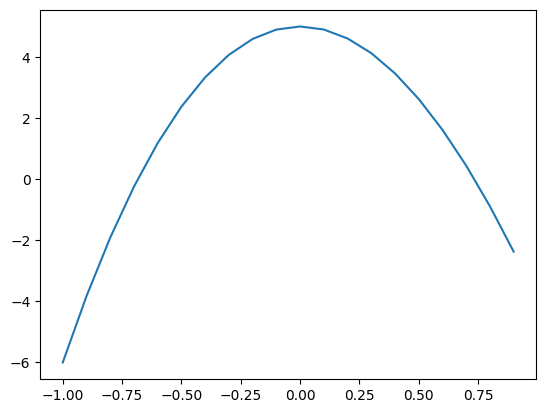

Se truncaron las últimas líneas 5000 del resultado de transmisión.
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene raíz
El intervlo no tiene ra

KeyboardInterrupt: 

In [21]:
#Biseccion
#x0,x1 las fronteras del intervalo, luego tomo x2=(x1+x2)/2
#si f(x0)*f(x2)<0, x1=x2
#if f(x2)*(fx1)<0, x0=x2 y sigo iterando cortando a la mitad, hasta que x2=(x0+x1)/2 sea la raiz
#convergencia 2**n
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def f(x):
  return (x**3)-10*(x**2)+5
x=np.arange(-1,1,0.1)
plt.plot(x,f(x))
#axhline()
plt.show()
def biseccion(f,x0,x1,epsilon=1e-7):
  contador=0
  dx=abs(x1-x0)
  while dx>epsilon:
   x2=(x0+x1)/2
   if f(x0)*f(x2)<0:
      x1=x2
   elif f(x2)*f(x1)<0:
      x0=x2
   else:
      dx=epsilon/2
      print('El intervlo no tiene raíz')
   dx=abs(x1-x0)
   contador=contador+1
  return [x2,contador]

print(biseccion(f,0,1))

lista_incremental=[]
idx=[]
valor_real=0.7346034646034241
for i in range(10):
 tol=10**(-i)
 idx.append(tol)
 raiz_data = biseccion(f, 0, tol) # Get the result from biseccion
 if raiz_data is not None: # Check if a root was found
  raiz, pasos = raiz_data # Unpack the tuple
  error=(abs(valor_real - raiz) / valor_real) * 100 # Calculate error using the root
  lista_incremental.append([raiz, pasos, error]) # Append as a list
 else:
  lista_incremental.append(['No hay raiz', 'N/A', 'N/A']) # Handle case where no root is found

cols=['raiz','pasos','error%']
pd.DataFrame(lista_incremental, index=idx,columns=cols)

In [26]:
#método Newton, el error numérico de este método es h^2
import numpy as np
def f(x):
  y1=x**3-10*x**2+5
  return y1
def df(x):
  y2=3*x**2-20*x
  return y2

epsilon=1e-6
def NR(x0, f, df):
  xi = x0
  tramo = abs(2*epsilon) # Initialize tramo with a value larger than epsilon
  while tramo >= epsilon:
    xn = xi - f(xi) / df(xi) # Call the functions with xi
    tramo = abs(xn - xi)
    xi = xn # Update xi for the next iteration
  return xi

print(NR(1, f, df)) # Pass the function objects and the initial guess

0.7346035077893185
